## Matplotlib

**Библиотека matplotlib** - это мультиплатформенная библиотека для визуализации данных. Создание базовых графиков весьма просто, но умело пользоваться остальным 90% функционалом библиотеки может быть сложно.

Изучение matplotlib временами может быть тяжелым процессом. Проблема не в нехватке документации (которая весьма обширная). Сложности могут возникнуть со следующим:
    - Размер библиотеки огромный сам по себе, около 70 000 строк кода;
    - Matplotlib содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов. (Бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру);
    - Несмотря на обширность, часть собственной документации matplotlib серьезно устарела. Библиотека все еще развивается, и множество старых примеров в сети могут включать на 70% меньше кода, чем в их современной версии.
    
**Немножко истории:** Нейробиолог Джон Д. Хантер начал разрабатывать matplotlib в 2003 году, в основном вдохновляясь эмуляцией команд программного обеспечения в MATLAB. Джон отошел в мир иной трагически рано, в возрасте 44 лет в 2012 году, и matplotlib на сегодняшний день является целиком и полностью продуктом сообщества: развивается и поддерживается множеством людей.

**Немного теории. Иерархия объектов в Matplotlib**

Одной из визитных карточек matplotlib является иерархия его объектов. Под «иерархией» понимается, что каждый график основывается на древоподобной структуре объектов matplotlib.

Объект ***Figure*** – это самый важный внешний контейнер для графики matplotlib, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании, может являться использование названия Axes(оси). На самом деле, под Axes понимается индивидуальный график (или диаграмма). Объект Figure похож на ящик (контейнер), содержащий один или несколько объектов Axes (настоящих графиков). Под объектами Axes, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые надписи. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок:

<center><img src="figure-matplotlib.jpg"></center>

**Элементы matplotlib:**
<center><img src="anatomy-matplotlib.jpg"></center>

<details><summary>Исходный код</summary>
<p>

```python
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(0)

X = np.linspace(0.5, 3.5, 200)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0, marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()

def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)

def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color=color))

ax.text(4.0, -0.4, "Код взят с http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()
```

</p>
</details>

`matplotlib` --- один из наиболее популярных пакетов для построения гарфиков

`%matplotlib inline` --- специальная `ipython` команда, которая позволяет отображать графики прямо в `jupyter notebook`

Некоторые основные команды для рисования графиков:
    
* `plt.scatter(x, y, *args)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси
* `plt.plot(x, y, *args)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах.
* `plt.contour(x1, x2, y, lines)` — нарисовать линии уровня.

Вспомогательные функции
* `plt.figure(figsize=(x, y))` — создать график размера $(x, y)$
* `plt.show()` — показать график.
* `plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси
* `plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси
* `plt.title(name)` — установить имя графика
* `plt.xlabel(name)` — установить название горизонтальной оси
* `plt.ylabel(name)` — установить название вертикальной оси
* `plt.legend()` — сделать легенду
* `plt.grid()` — добавить сетку на график
* `plt.savefig(filename)` — сохранить график в файл

Для отображения в notebook

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
# установим фиксированный размер наших графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
# для того, чтобы не засорять вывод предупреждениями
import warnings
warnings.filterwarnings('ignore')

Сейчас пора, когда многие болеют. Построим зависимость числа больных в семье Ивановых и Сидоровых от температуры на улице.

Мы имеем дискретное распределение, поэтому самое напрашиваемое представление это обычные точки

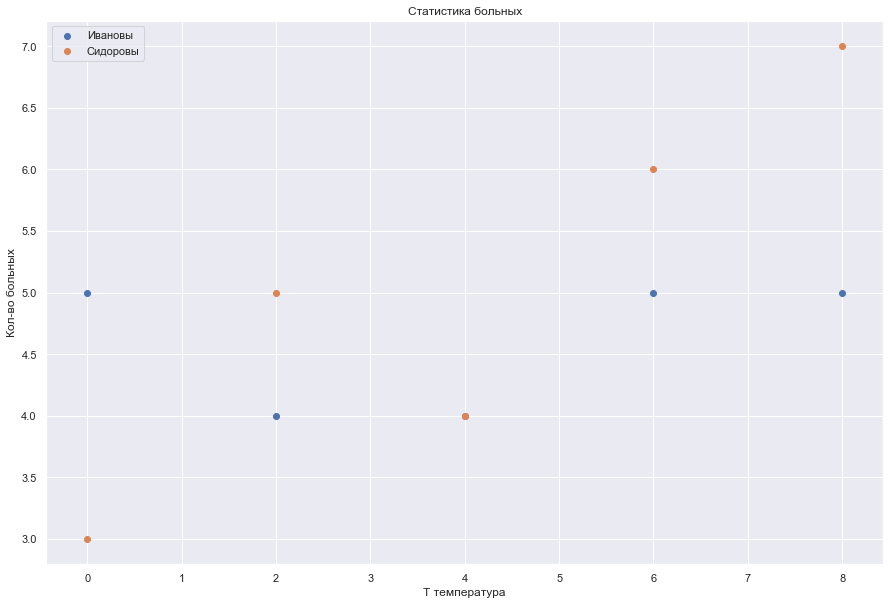

In [6]:
np.random.seed(42)
family_ivan = np.random.poisson(5, 5)
family_sid = np.random.poisson(5, 5)

x = np.arange(0, 10, 2)
plt.scatter(x, family_ivan, label='Ивановы')
plt.scatter(x, family_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Чтобы отследить зависмость лучше, воспользуемся непрерывным представление

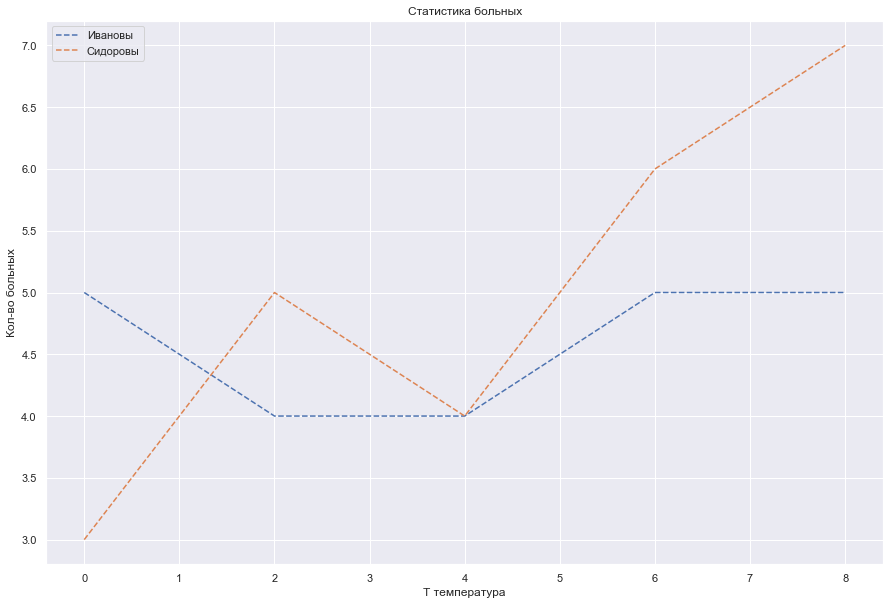

In [8]:
plt.plot(x, family_ivan, '--', label='Ивановы')
plt.plot(x, family_sid, '--', label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Давайте попробуем другое представление полученных данных c помощью bar-chart:

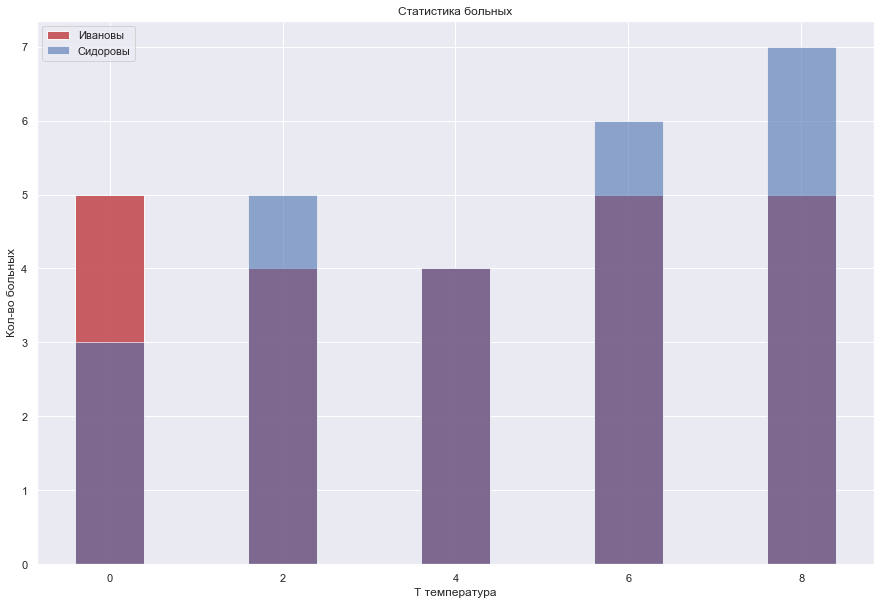

In [10]:
plt.bar(x, family_ivan, alpha=0.9 , label='Ивановы', color='r')
plt.bar(x, family_sid, alpha=0.6, label='Сидоровы', color='b')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()


Можно попробовать нарисовать статистику в виде так называемого *pie-chart*

Заодно посмотрим, как на одной фигуре отрисовать несколько графиков

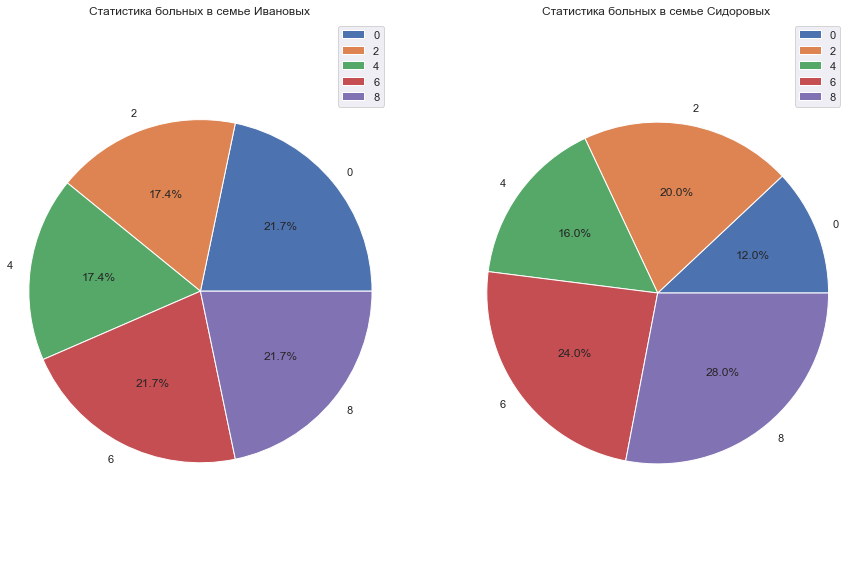

In [12]:
plt.subplot(1, 2, 1)
plt.pie(family_ivan, labels=x, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Статистика больных в семье Ивановых')
plt.legend()
plt.subplot(1, 2, 2)
plt.pie(family_sid, labels=x, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Статистика больных в семье Сидоровых')
plt.legend()
plt.show()

Данные графики получились не интуитивно понятными.

Визуализация данных - важная часть работы, и всегда надо думать, в каком виде лучше представить их, чтобы графики получались наиболее информативными и понятными/

Давайте функции зависимоcти сделаем более гладкими:

In [14]:
from scipy.interpolate import interp1d
f_ivan = interp1d(np.arange(0, 10, 2), family_ivan, kind='quadratic', fill_value="extrapolate")
f_sid = interp1d(np.arange(0, 10, 2), family_sid, kind='quadratic', fill_value="extrapolate")

Отобразим получившиеся функции:

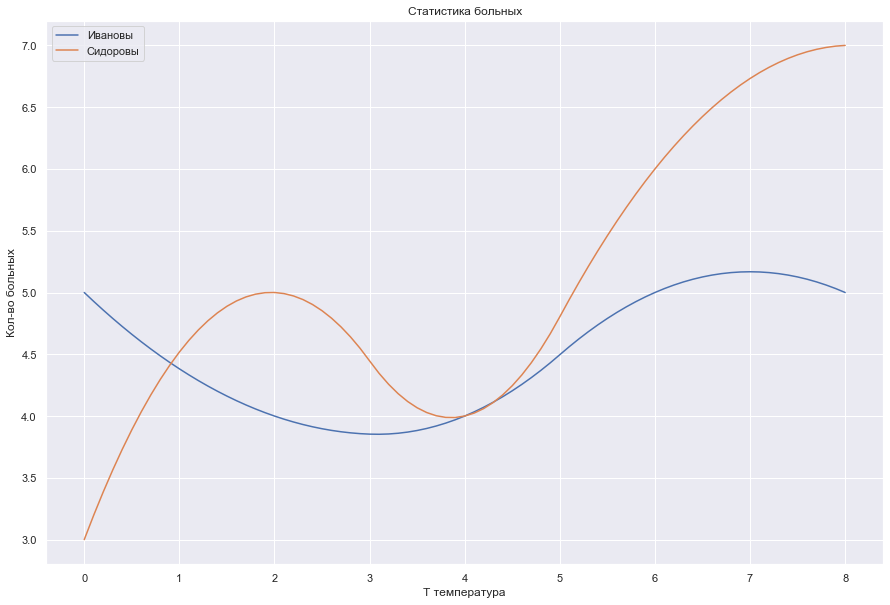

In [15]:
xnew = np.arange(0, 8.1, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Найдем оптимальную температуру для каждой семьи

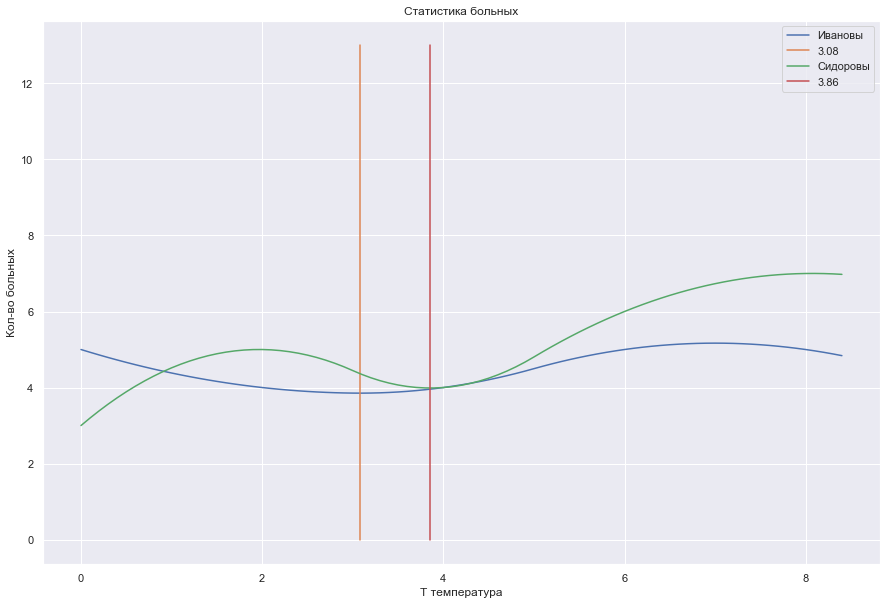

In [16]:
from scipy.optimize import minimize
max_ivan = minimize(f_ivan, x0=4)
max_sid = minimize(f_sid, x0=4)
xnew = np.arange(0, 8.5, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot([max_ivan.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_ivan.x[0].round(2)))
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.plot([max_sid.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_sid.x[0].round(2)))
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Также можно строить геометрические фигуры или параметрические линии $x=x(t)$, $y=y(t)$.

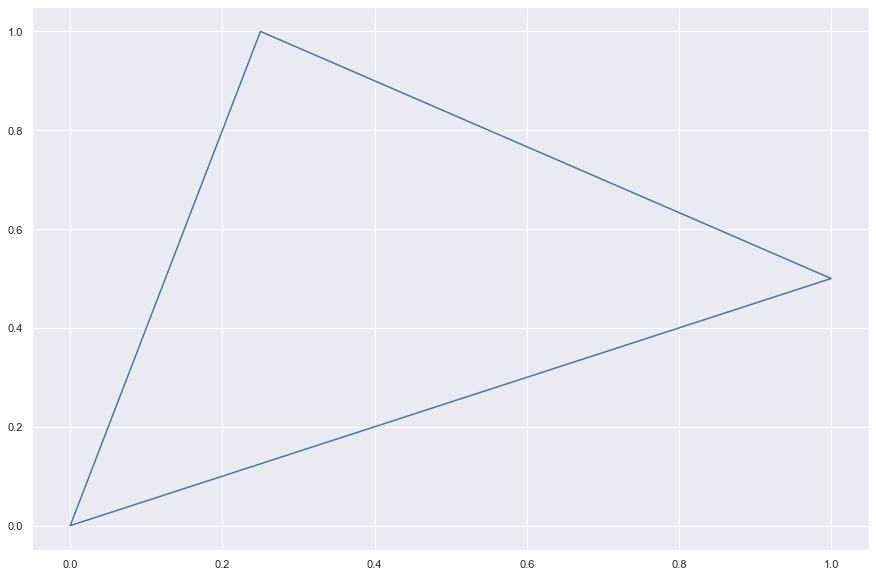

In [18]:
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

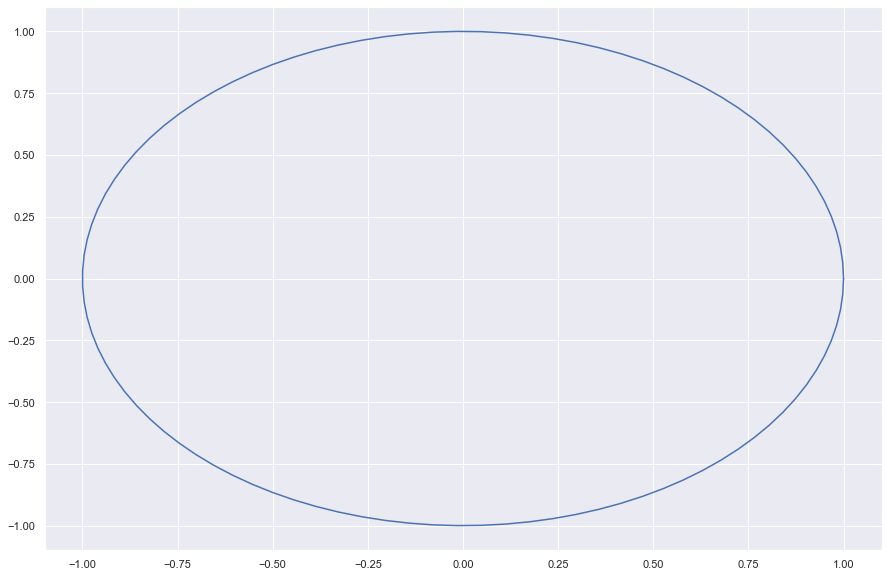

In [19]:
t = np.linspace(0, 2 * np.pi, 100)

plt.plot(np.cos(t), np.sin(t))
# plt.axes().set_aspect(1)
plt.show()

Попробуем сгенерировать выборку из нормального распределения и порисовать для нее графики. Если что-то будет не понятно, не страшно, наша цель - попрактиковаться в построении графиков

In [20]:
# сгенерируем 200 случайных точек
import scipy.stats as sps

sample = sps.norm.rvs(size=200)

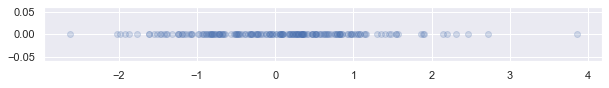

In [21]:
plt.figure(figsize=(10, 1))
plt.scatter(sample, np.zeros(200), alpha=0.2)  # alpha - прозрачность точки
plt.show()

Добавим график плотности

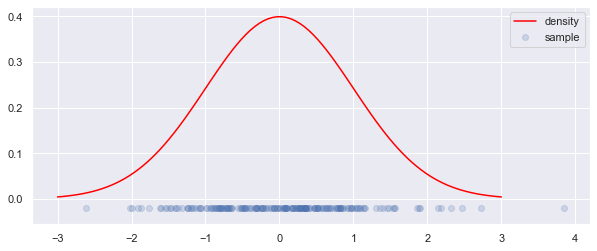

In [22]:
grid = np.linspace(-3, 3, 100)

plt.figure(figsize=(10, 4))
plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.2, label='sample')
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')
plt.legend()
plt.show()

Нарисуем гистограмму, вместо точек, т.к. она более наглядна

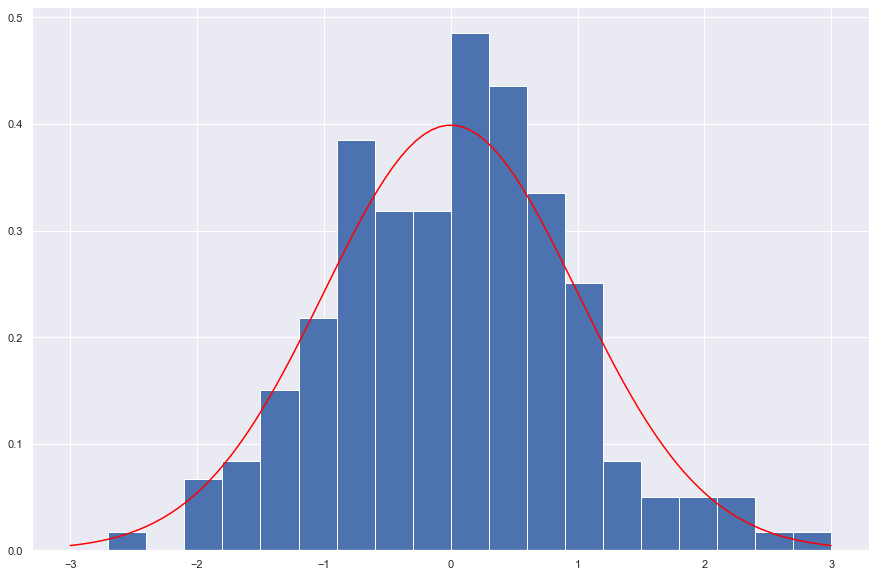

In [23]:
plt.figure()
plt.hist(sample, range=(-3, 3), bins=20, normed=True)
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')
plt.show()

**Линии уровня**

Предположим, что мы хотим изучить поверхность $z = xy$

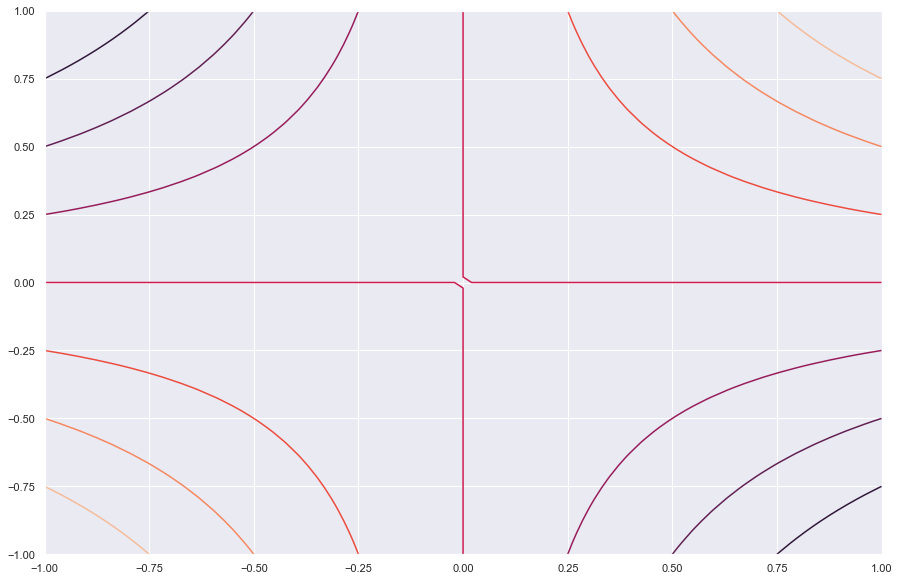

In [24]:
x = np.linspace(-1, 1, 50)
y = x
# внешнее произведение
# т.е, если размер x и y = 50, то размер z = (50, 50)
# где z[i][j] = x[i]*y[j]
z = x.reshape(-1, 1) * y

plt.contour(x, y, z)
plt.show()

Более наглядный график

Здесь значение задается цветом

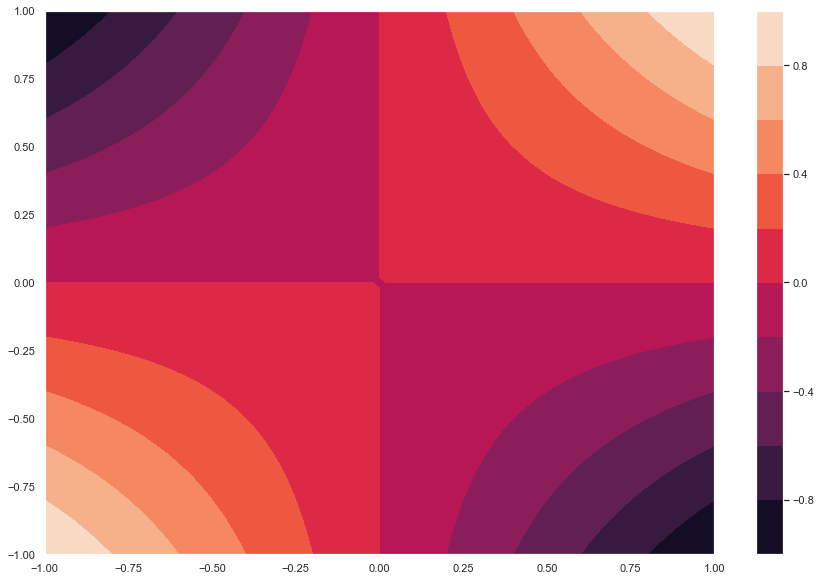

In [25]:
plt.contourf(x, y, z, np.linspace(-1, 1, 11))
# colorbar показывает соответствие цвета и значения z
plt.colorbar()
plt.show()

А теперь построим график в полярных координатах

In [26]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(2 * x)
y4 = np.sin(4 * x)

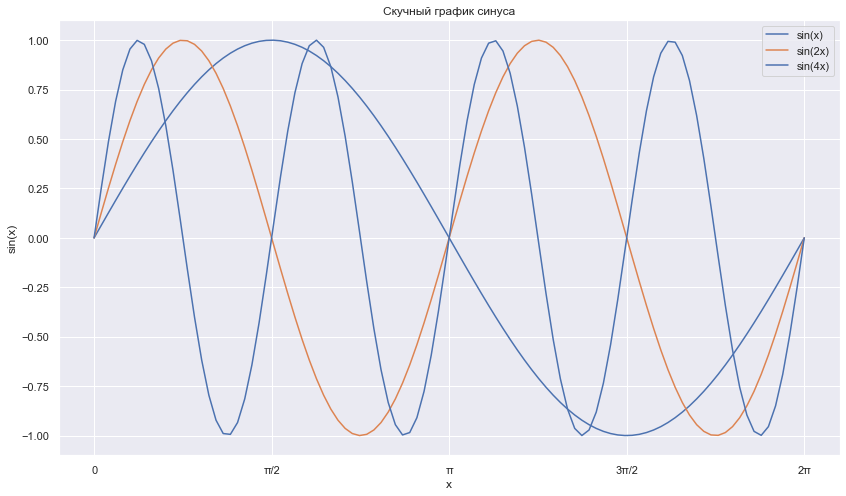

In [27]:
# Обычный график
plt.figure(figsize=(14, 8))
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='sin(2x)')
plt.plot(x, y4, label='sin(4x)', c='b')
plt.title('Скучный график синуса')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ['0', 'π/2', 'π', '3π/2', '2π'])
plt.legend()
plt.show()

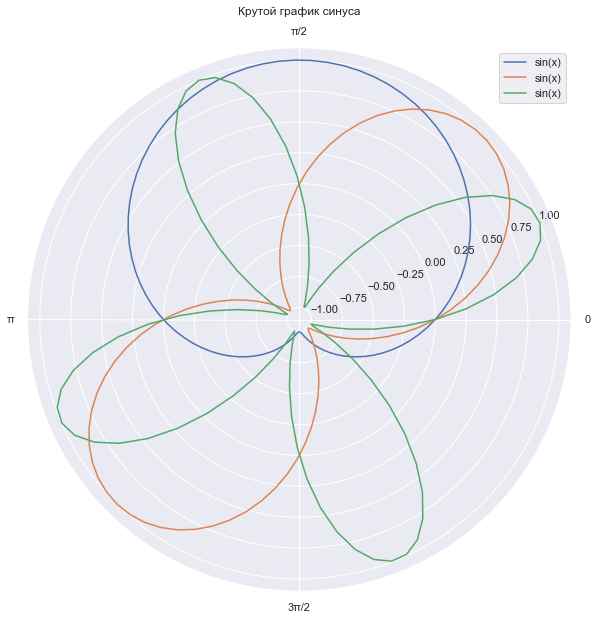

In [28]:
# Полярный график
plt.polar(x, y1, label='sin(x)')
plt.polar(x, y2, label='sin(x)')
plt.polar(x, y4, label='sin(x)')
plt.title('Крутой график синуса')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ['0', 'π/2', 'π', '3π/2', ''])
plt.legend()
plt.show()

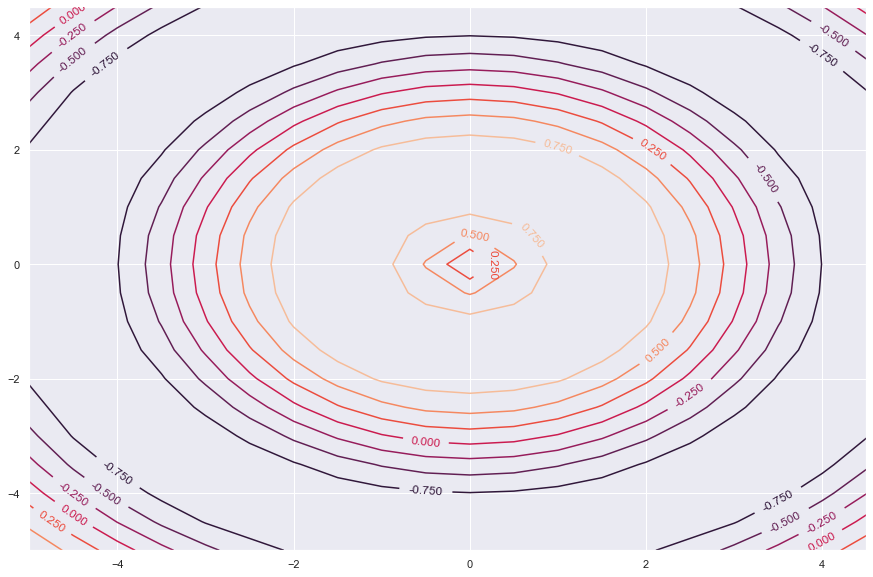

In [29]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca()

# определение данных
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X*X + Y*Y)
Z = np.sin(R)

# построение линий уровня
cs = ax.contour(X, Y, Z)

# добавление подписей к линиям уровня
ax.clabel(cs)

plt.show()

## 3d графика
Параметрическая кривая
$$x=x(t), y=y(t), z=z(t)$$

In [32]:
t=np.linspace(0,4*np.pi,100)
x=np.cos(t)
y=np.sin(t)
z=t/(4*np.pi)

Тут нужен объект класса Axes3D из пакета mpl_toolkits.mplot3d. figure() - это текущий рисунок, создаём в нём объект ax, потом используем его методы.

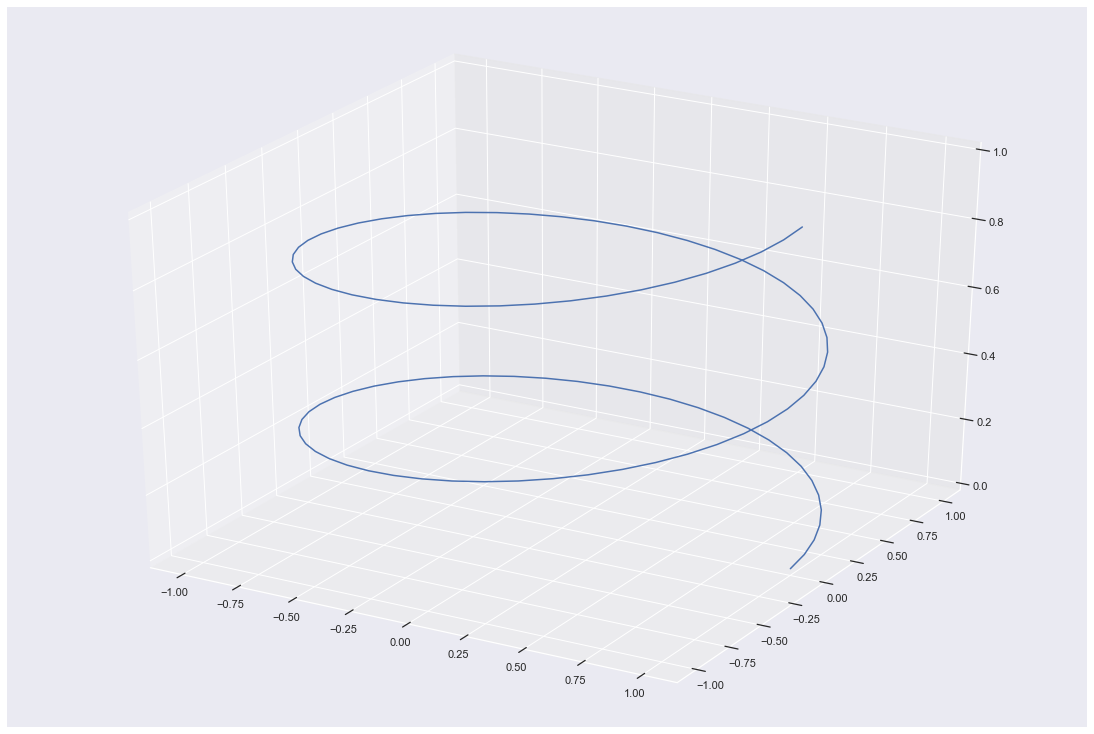

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
ax.plot(x,y,z)

К сожалению, inline трёхмерную картинку нельзя вертеть мышкой (это можно делать с трёхмерными картинками в отдельных окнах). Но можно задать, с какой стороны мы смотрим.

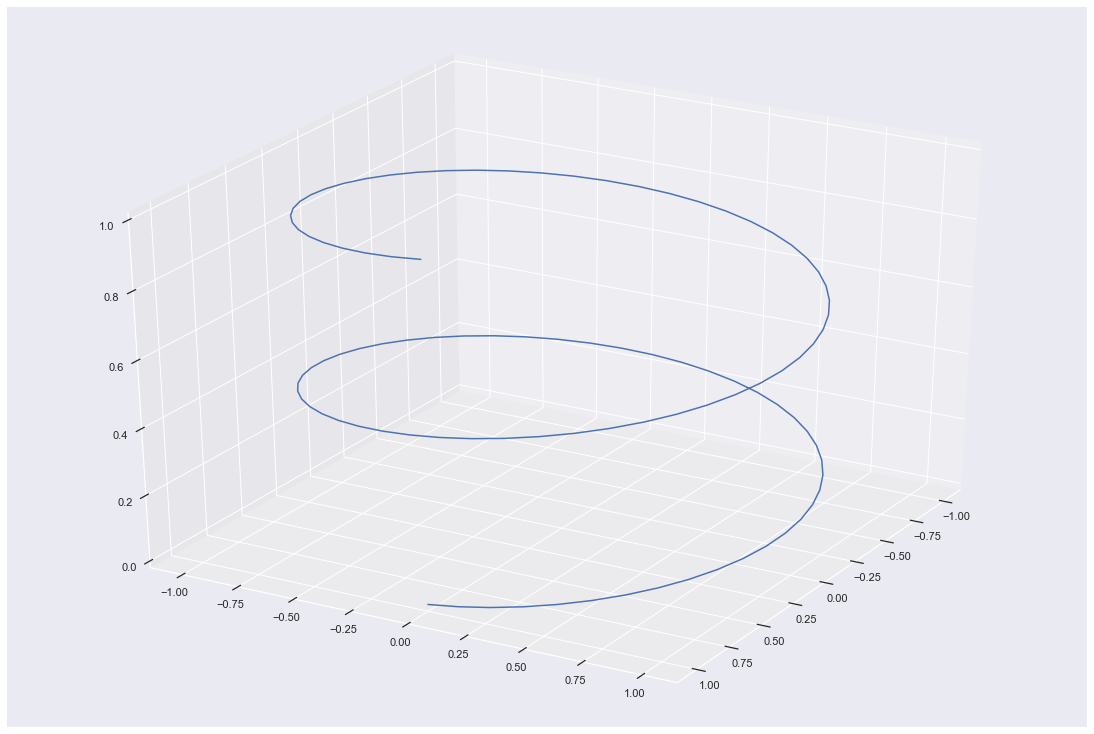

In [35]:
fig=plt.figure()
ax=Axes3D(fig)
ax.elev,ax.azim=30,30
ax.plot(x,y,z)

## Поверхности
Все поверхности параметрические:  $x=x(u,v) ,  y=y(u,v) ,  z=z(u,v)$ . Если мы хотим построить явную поверхность  $z=z(x,y)$ , то удобно создать массивы  $x=u  и  y=v$  функцией meshgrid.

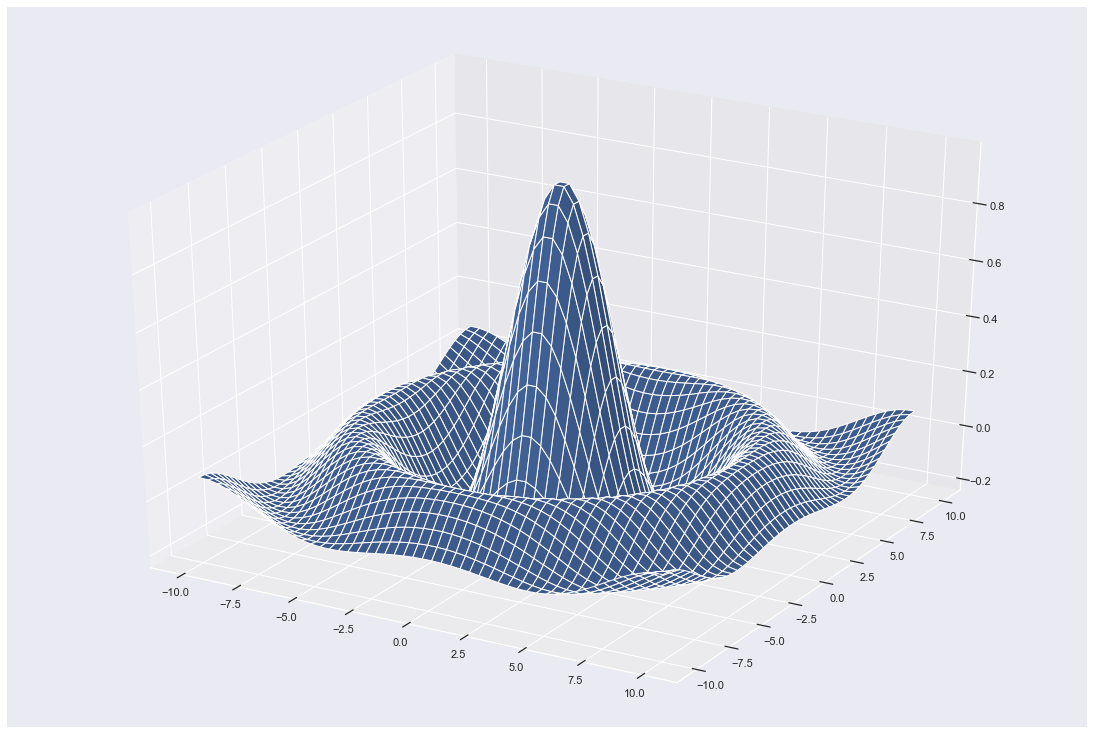

In [37]:
X=10
N=50
u=np.linspace(-X,X,N)
x,y=np.meshgrid(u,u)
r=np.sqrt(x**2+y**2)
z=np.sin(r)/r
fig=plt.figure()
ax=Axes3D(fig)
ax.plot_surface(x,y,z,rstride=1,cstride=1)

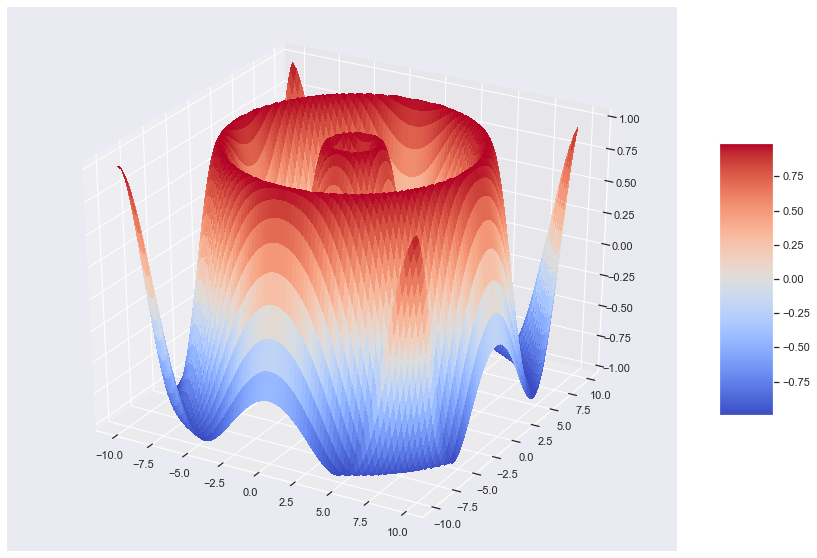

In [38]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# определение данных
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X*X + Y*Y)
Z = np.sin(R)

# построение поверхности
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=5)    
plt.show()

В прикладной математике, тестовые функции, известные как искусственные ландшафты, являются полезными для оценки характеристик алгоритмов оптимизации, таких как:

    - Скорость сходимости;
    - Точность;
    - Робастность;
    - Общая производительность.

**Общая форма уравнения, область опредения целевой функции, границы переменные объекта и координаты глобального минимума:** 

1. **Функция Растригина** — невыпуклая функция, предложена в 1974 году Леонардом Растригиным как функция двух переменных и в 1991 году была обобщена на высшие размерности. Нахождение минимума этой функции является достаточно трудной задачей из-за большой области поиска и большого количества локальных минимумов:

$$f(x,y)=2*A+(x^2-A*cos(2\pi*x))+(y^2-A*cos(2\pi*y))\rightarrow min,\;где\;A=10,\;x,y\in\left[-5.12;5.12\right]$$

2. **Функция Розенброка** (англ. Rosenbrock function, Rosenbrock's valley, Rosenbrock's banana function) — невыпуклая функция, предложенная Ховардом Розенброком (англ.) в 1960 году. Считается, что поиск глобального минимума для данной функции является нетривиальной задачей. Каноническое определение:

$$f(x,y)=(1-x)^2+100*(y-x^2)^2\rightarrow min,\;где\;x,y\in[-\infty,\infty]$$

3. **Функция Химмельблау** (анг. Himmelblau) — мультимодальная функция двух переменных. Функция названа в честь Дэвида Мотнера Химельблау (1924—2011), который впервые её использовал. Определяется формулой:

$$f(x,y)=(x^2 + y − 11)^2 + (x + y^2 − 7)^2\rightarrow min,\;где\;x,y\in\left[-5;5\right]$$

4. **Функция Де Янга** (анг. De Jong). Определяется формулой:

$$f(x,y)=3905.93-100*(x^2-y^2)^2-(1-x)^2 \rightarrow max,\; где\;x,y\in\left[-2.048;2.048\right]$$


5. **Функция Стенгера** (анг. Stenger). Определяется формулой:

$$f(x,y)=(x^2-4y)^2+(x^2-2x+4y)^2 \rightarrow min,\; где\;x,y\in\left[-1;4\right]$$

6. **Функция Мартина и Гадди** (анг. Martin, Gaddy). Определяется формулой:

$$f(x,y)=(x-y)^2+((x+y-10)/3)^2 \rightarrow min,\; где\;x,y\in\left[-10;10\right]$$

7. **Функция Экли** (анг. Ackley). Определяется формулой:

$$f(x,y)=-20*e^{-0.2\sqrt{0.5(x^2+y^2)}} - e^{0.5(cos(2\pi*x)+cos(2\pi*y))} + 20 + e \rightarrow min,\; где\;x,y\in\left[-100;100\right]$$

## **Задача:** 
- построить заданный график функции;
- построить линии уровня.

In [4]:
# ваш код здесь

**Заключение**

Мы посмотрели только на малую часть функциональности `matplotlib` --- эта библиотека имеет множество других функций, которые помогут вам построить почти любой график, которые вы захотите, и рассмотрение всех этих функций никак не уложится в одно занятие

Стоит посмотреть https://matplotlib.org/gallery.html --- здесь собраны сотни примеров, как можно рисовать графики

`matplotlib` - мощный инструмент, однако, чтобы рисовать действительно красивые графики, он требует больших знаний

Стоит обратить внимание на следующие библиотеки:


`seaborn` (оф сайт: https://seaborn.pydata.org/) - это библиотека, которая написана поверх `matplotlib`, и она помогает строить более красивые графики, затрачивая меньшее количество усилий

Если интересно, то можно посмотреть:

* https://seaborn.pydata.org/tutorial.html - оф. туториалы

* https://habr.com/ru/company/ods/blog/323210/ - замечательная статья на habre от ods

`plotly` (оф сайт: https://plot.ly/) - еще одна библиотека для рисования графиков, которая написана поверх `javascript` библиотеки

Если интересно, то стоит посмотреть:
* https://plot.ly/python/ - официальные туториалы (можете сравнить, насколько получаются более красивые графики)
* https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e - неплохая статья на medium